<img src="img/image.png" width=800 height=50 />

# Problem Statement-
**Build a Predictive Model so as to suggest the most suitable crops to grow based on available Climatic and Soil Conditions.**


*Goal=
Achieve Precision farming by Optimizing the Agricultural Production*

# IMPORTING AND EXPLORING THE  DATASET

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('agriculture.csv')
#importing the dataset

In [80]:
df.head(10)


,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,3
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,3
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,3
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,3
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,3


In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


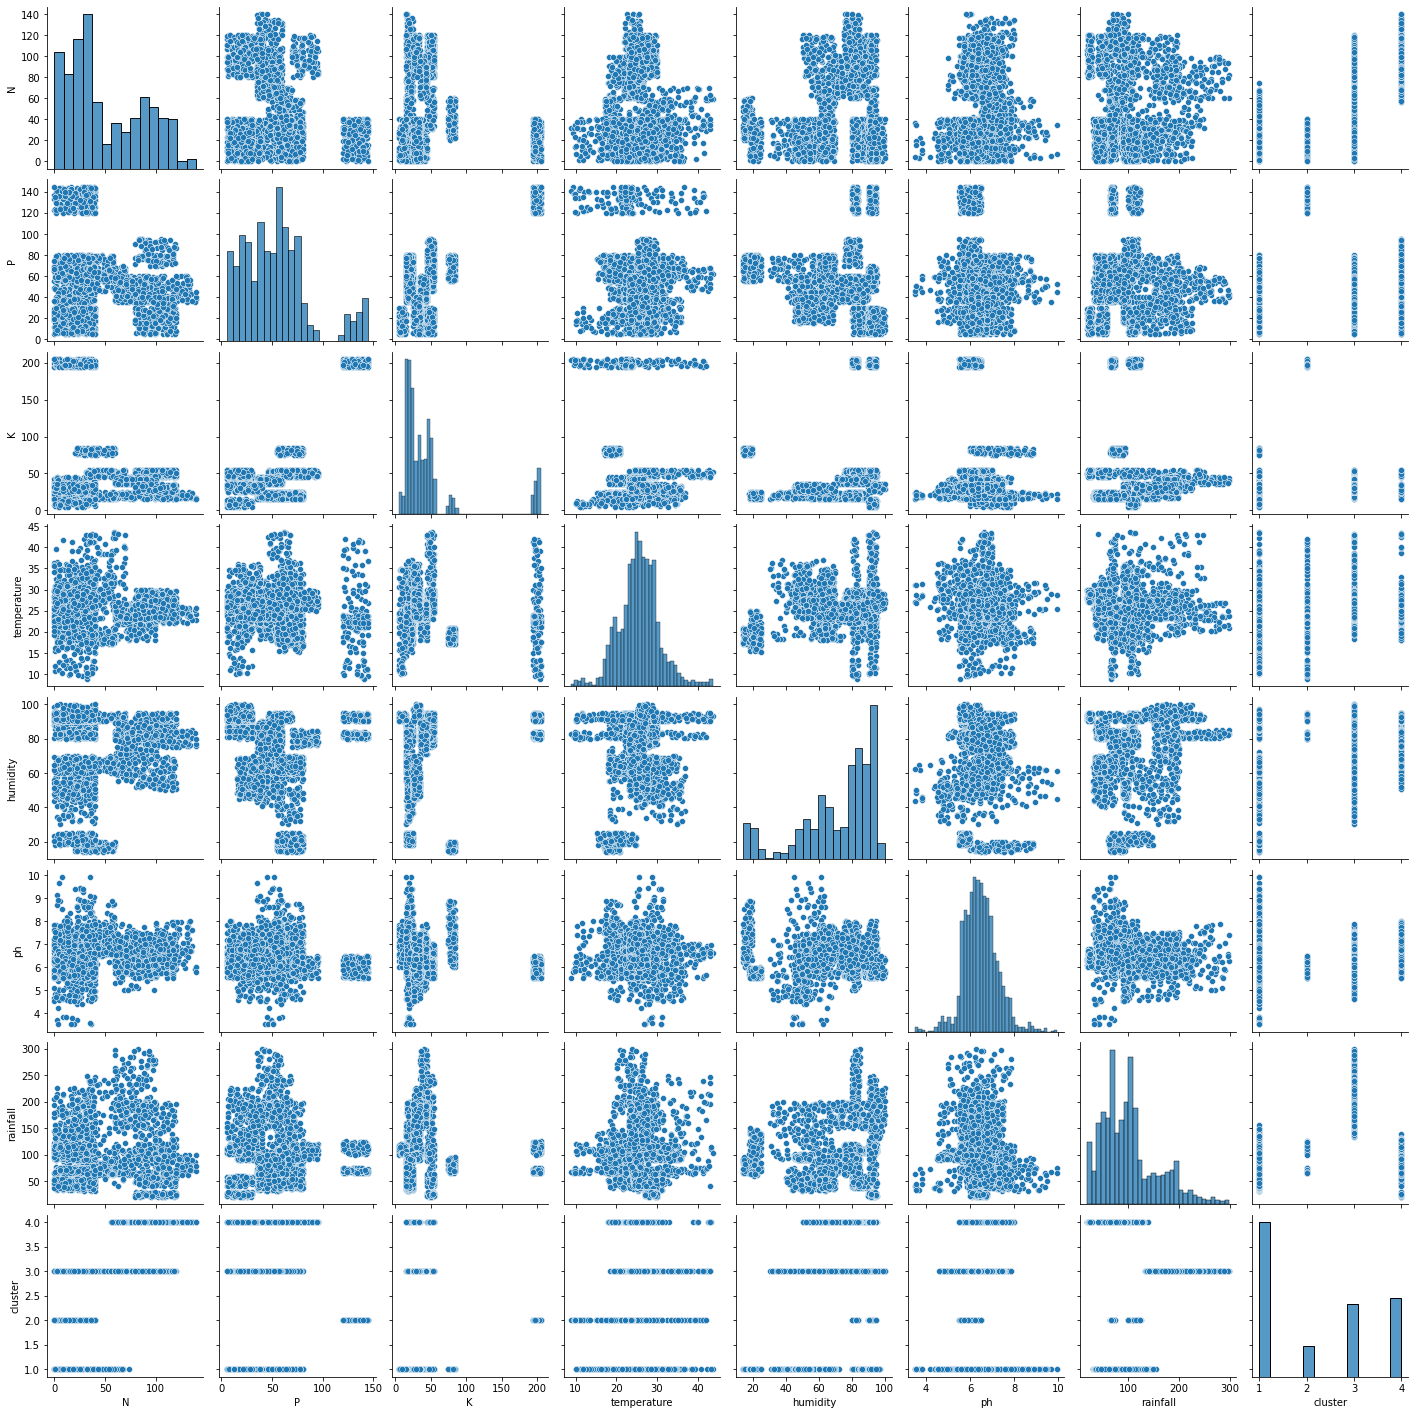

In [84]:
sns.pairplot(df)

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='K', ylabel='Density'>

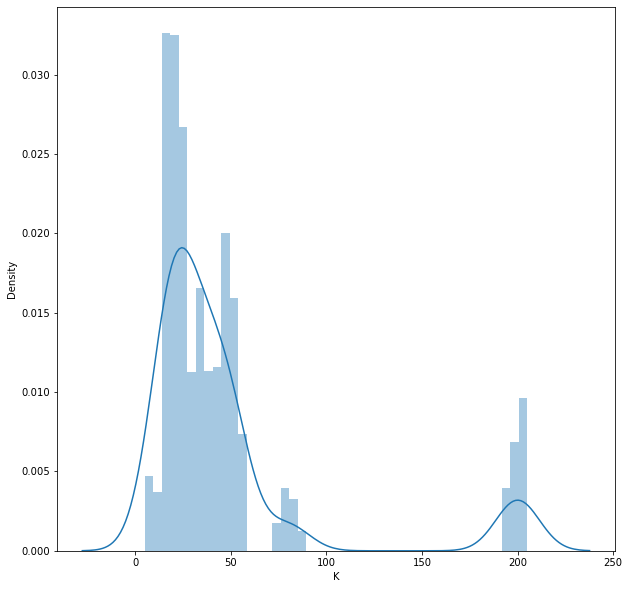

In [85]:
sns.distplot(df['K'])

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P', ylabel='Density'>

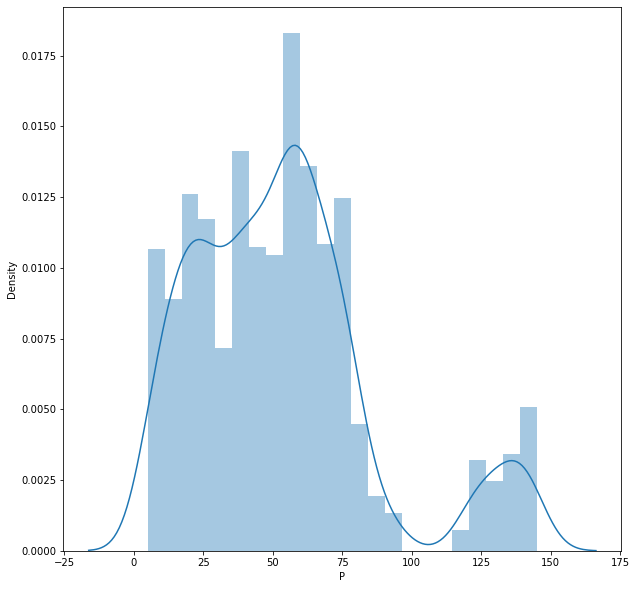

In [86]:
sns.distplot(df['P'])

# Season Wise Classification


In [105]:
print('Summer Crops')
print(df[(df['temperature']>30)&(df['humidity']>50)]['label'].unique())
print('-------------------------------------------------------------------')

print('Winter Crops')
print(df[(df['temperature']<20)&(df['humidity']>30)]['label'].unique())
print('-----------------------------------------------------------------')

print('Rainy Crops')
print(df[(df['rainfall']>200)&(df['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


# Lets Perform Clustering First

**It will help farmers to identify crops similarity**

In [6]:
from sklearn.cluster import KMeans


In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df.drop(['label'],axis=1))

y_kmeans

array([2, 2, 2, ..., 2, 3, 2])

In [8]:
y_kmeans1=y_kmeans+1


# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [9]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,4


In [109]:
print('\nCrops in First Cluster=',df[df['cluster']==1]['label'].unique())
print('\nCrops in Second Cluster=',df[df['cluster']==2]['label'].unique())
print('\nCrops in Third Cluster=',df[df['cluster']==3]['label'].unique())
print('\nCrops in Fourth Cluster=',df[df['cluster']==4]['label'].unique())


Crops in First Cluster= ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']

Crops in Second Cluster= ['grapes' 'apple']

Crops in Third Cluster= ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']

Crops in Fourth Cluster= ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


# MODEL BUILDING PART

In [13]:
x=df.drop(['label'],axis=1)
y=df['label']

In [14]:
x

,N,P,K,temperature,humidity,ph,rainfall,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,3
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,3
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,4


In [15]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('x_trainshape',x_train.shape)
print('x_testShape',x_test.shape)
print('Y_train',y_train.shape)
print('Y_test',y_test.shape)

x_trainshape (1760, 8)
x_testShape (440, 8)
Y_train (1760,)
Y_test (440,)


In [37]:
y_pred

array(['apple', 'jute', 'jute', ..., 'blackgram', 'lentil', 'orange'],
      dtype=object)

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred

array(['apple', 'jute', 'jute', ..., 'blackgram', 'lentil', 'orange'],
      dtype=object)

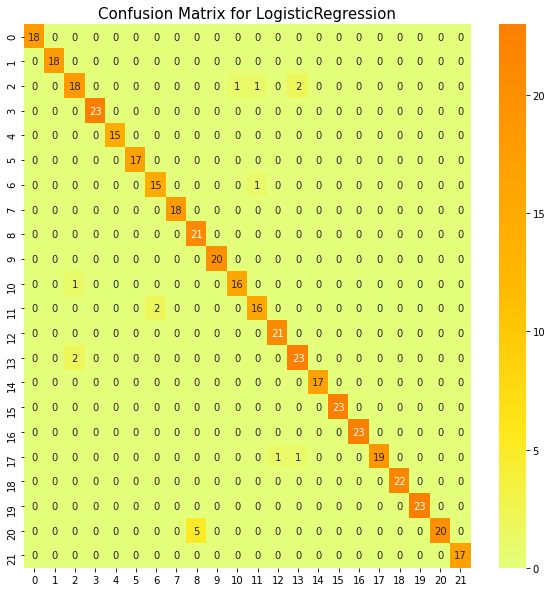

In [45]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion Matrix for LogisticRegression',fontsize=15)
plt.show()
#For checking Accuracy

In [53]:
from sklearn.metrics import classification_report
ce=classification_report(y_test,y_pred)
print(ce)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.88      0.94      0.91        16
      grapes       1.00      1.00      1.00        18
        jute       0.81      1.00      0.89        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.89      0.89      0.89        18
       mango       0.95      1.00      0.98        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

# lets_try_this_out ;-)

In [54]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3


In [68]:
cols=x_train.columns

In [73]:
import numpy as np

In [78]:
new_data=model.predict((np.array([[90,40,32,20,82,5,200,3]])))
print('The Predicted Crop is',new_data)

The Predicted Crop is ['rice']


**ACCORDING TO OUR MODEL THE PREDICTED CROP IS "RICE"... AND PREDICTION IS ABSOLUTELY RIGHT!!!!!**